[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/<your_github_username>/<your_repository_name>/blob/main/notebooks/model_development.ipynb)
[![Kaggle Notebook](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/new?source=https://github.com/mobadara/<your_repository_name>/blob/main/notebooks/model_development.ipynb)
[![Python](https://img.shields.io/badge/python-3.7+-blue.svg)](https://www.python.org/downloads/)

# **Model Development - Cardiovascular Disease Risk Prediction**

## **Introduction**
This notebook marks the beginning of the model development phase for our Cardiovascular Disease Risk Prediction project. Having thoroughly explored the dataset in the Exploratory Data Analysis (EDA) and enriched it with new features during Feature Engineering, we are now ready to train and compare various machine learning models.

* **EDA Notebook:** [![Open In GitHub](https://img.shields.io/badge/View%20EDA%20Notebook-blue?logo=github)](https://github.com/mobadara/cardiovascular-disease-risk-prediction/blob/main/notebooks/exploratory-data-analysis.ipynb)
* **Feature Engineering Notebook:** [![Open In GitHub](https://img.shields.io/badge/View%20FE%20Notebook-blue?logo=github)](https://github.com/mobadara/cardiovascular-disease-risk-prediction/blob/main/notebooks/feature-engineering.ipynb)

In this notebook, we will focus on building and evaluating several classification models to predict cardiovascular disease (`cardio`), including:

* **Logistic Regression**
* **Decision Tree / Random Forest**
* **Gradient Boosting Machines (e.g., LightGBM, XGBoost)**
* And potentially others like **Support Vector Machines (SVM)** or **K-Nearest Neighbors (KNN)**.

We will also implement essential preprocessing steps such as One-Hot Encoding and Standard Scaling, and carefully evaluate each model's performance using relevant metrics. Let's get started!

## **Notebook Setup**

Before diving into model development, we need to ensure all necessary libraries are imported and initial settings are configured. The following code cell will import the required Python libraries for data manipulation, numerical operations, machine learning model building, and visualization, and set up basic display options for pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
                            roc_auc_score, confusion_matrix, classification_report, roc_curve,\
                            auc
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## **Data Loading**

The initial step in this model development phase is to load the dataset that has undergone the complete feature engineering process. This dataset, enriched with new features like BMI, age in years, and blood pressure categories, was the output of our previous feature engineering notebook and has been saved to the GitHub repository.

The following cell will load this prepared dataset directly from its raw URL on GitHub into a pandas DataFrame.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mobadara/cardiovascular-disease-risk-prediction/main/data/cardio-engineered.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_group,blood_pressure_category,pulse_pressure
0,0,50.357290,Male,168,62.0,110,80,Normal,Normal,No,No,Active,0,21.967120,Middle-Aged,Hypertension Stage 1,30
1,1,55.381246,Female,156,85.0,140,90,Well Above Normal,Normal,No,No,Active,1,34.927679,Senior,Hypertension Stage 2,50
2,2,51.627652,Female,165,64.0,130,70,Well Above Normal,Normal,No,No,Inactive,1,23.507805,Middle-Aged,Hypertension Stage 1,60
3,3,48.249144,Male,169,82.0,150,100,Normal,Normal,No,No,Active,1,28.710479,Middle-Aged,Hypertension Stage 2,50
4,4,47.841205,Female,156,56.0,100,60,Normal,Normal,No,No,Inactive,0,23.011177,Middle-Aged,Normal,40


Let's make sure that the columns are in the right format.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       70000 non-null  int64  
 1   age                      70000 non-null  float64
 2   gender                   70000 non-null  object 
 3   height                   70000 non-null  int64  
 4   weight                   70000 non-null  float64
 5   ap_hi                    70000 non-null  int64  
 6   ap_lo                    70000 non-null  int64  
 7   cholesterol              70000 non-null  object 
 8   gluc                     70000 non-null  object 
 9   smoke                    70000 non-null  object 
 10  alco                     70000 non-null  object 
 11  active                   70000 non-null  object 
 12  cardio                   70000 non-null  int64  
 13  bmi                      70000 non-null  float64
 14  age_group             

Now, we need to set the data type of each column to the appropriate format. This makes it easy to apply the appropriate transformation to the neccessary column.

In [4]:
df['gender'] = df['gender'].astype('category')
df['cholesterol'] = df['cholesterol'].astype('category')
df['gluc'] = df['gluc'].astype('category')
df['smoke'] = df['smoke'].astype('category')
df['alco'] = df['alco'].astype('category')
df['active'] = df['active'].astype('category')
df['age_group'] = df['age_group'].astype('category')
df['blood_pressure_category'] = df['blood_pressure_category'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       70000 non-null  int64   
 1   age                      70000 non-null  float64 
 2   gender                   70000 non-null  category
 3   height                   70000 non-null  int64   
 4   weight                   70000 non-null  float64 
 5   ap_hi                    70000 non-null  int64   
 6   ap_lo                    70000 non-null  int64   
 7   cholesterol              70000 non-null  category
 8   gluc                     70000 non-null  category
 9   smoke                    70000 non-null  category
 10  alco                     70000 non-null  category
 11  active                   70000 non-null  category
 12  cardio                   70000 non-null  int64   
 13  bmi                      70000 non-null  float64 
 14  age_gr

## **Multicolinearity**
Now that the dataset is in the right format, we need to drop columns that correlates with each other. This is a problem known as multicolinearity. We will also drop high cardinality columns (id in most datasets).

A heatmap plotted on the numerical features will enable us to identify features that correlates with themselves.

In [7]:
df.drop(columns='id', inplace=True)

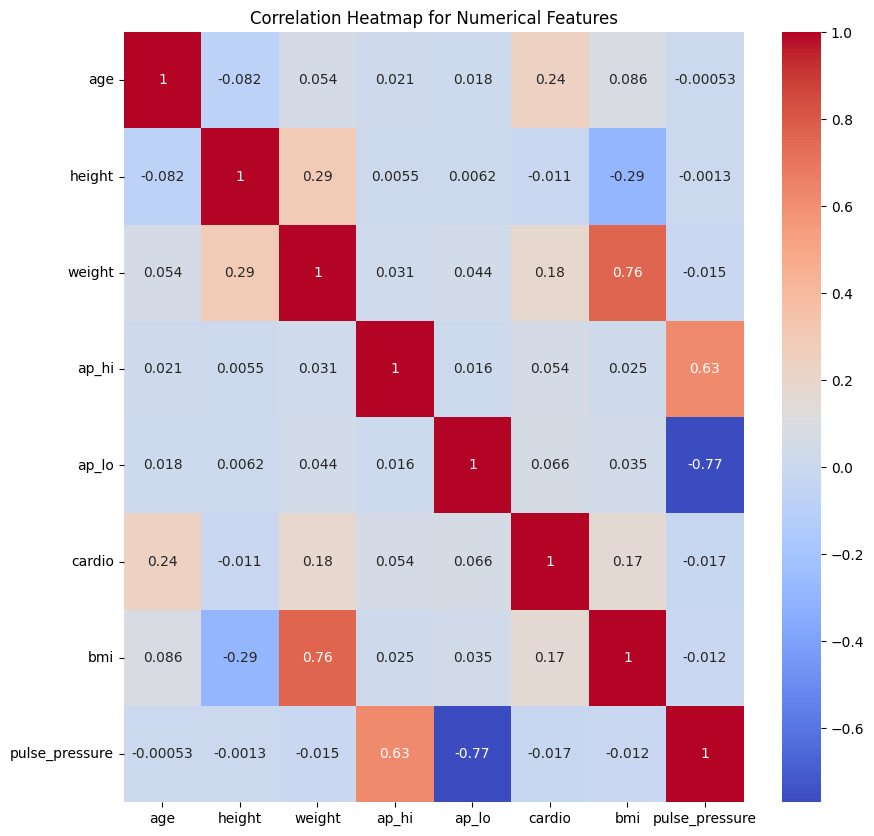

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
ax.set_title('Correlation Heatmap for Numerical Features')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

- `weight` is highly correlated with `bmi` as seen but `bmi` is more informative, hence `weight` should be dropped.
- `ap_hi` and `ap_lo` are correlated with `pulse_pressure`, and since `pulse_pressure` was derived from the two, the two features can be dropped.

In [11]:
df.drop(columns=['weight', 'ap_hi', 'ap_lo'], inplace=True)

In [13]:
df.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      70000 non-null  float64 
 1   gender                   70000 non-null  category
 2   height                   70000 non-null  int64   
 3   cholesterol              70000 non-null  category
 4   gluc                     70000 non-null  category
 5   smoke                    70000 non-null  category
 6   alco                     70000 non-null  category
 7   active                   70000 non-null  category
 8   cardio                   70000 non-null  int64   
 9   bmi                      70000 non-null  float64 
 10  age_group                70000 non-null  category
 11  blood_pressure_category  70000 non-null  category
 12  pulse_pressure           70000 non-null  int64   
dtypes: category(8), float64(2), int64(3)
memory usage: 3.2 MB
